In [160]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [161]:
data=pd.read_csv("Ecommerce Customers.csv")
data.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\r\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\r\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\r\nCobbborough,...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\r\nPort Jason, OH 22070-...",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\r\nPort Jacobville, PR...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [162]:
#Checking for null values
data.isnull().sum()

Email                   0
Address                 0
Avatar                  0
Avg. Session Length     0
Time on App             0
Time on Website         0
Length of Membership    0
Yearly Amount Spent     0
dtype: int64

In [163]:
#Checking Data types
data.dtypes

Email                    object
Address                  object
Avatar                   object
Avg. Session Length     float64
Time on App             float64
Time on Website         float64
Length of Membership    float64
Yearly Amount Spent     float64
dtype: object

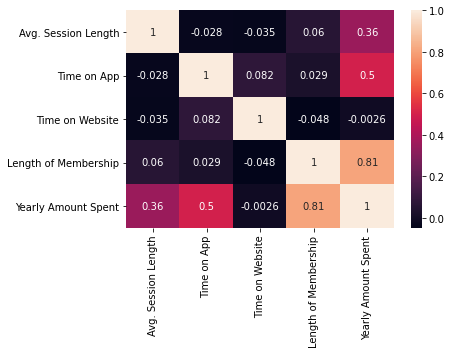

In [164]:
sns.heatmap(data.corr(),annot=True)
plt.show()

Assuming our Depenedent variable to be Yearly Amount Spent , it's correlation with the Avg. Session Length,Time on App,Time on Website and Length of Membership is  high .And so we consider them as our only independent variable. 

In [180]:
#Defining independent and dependent variable
X=data.iloc[:,3:7].values
y=data.iloc[:,-1].values
y=y.reshape(len(y),1)

In [181]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y)

In [182]:
#Splitting Data into Training & Testing Set
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=42)

In [183]:
#Training Simple Linear Regression model on training set
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [195]:
#Predicting Test set results
y_pred=regressor.predict(X_test)

In [196]:
sc_y.inverse_transform(regressor.predict(sc_X.transform([[34,12,39,4]])))#Predicted Annual Amount Spent for given features

array([[551.13191233]])

In [199]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.9778130629248283

Therefore by using Linear regression we can predict the Annual Amount spent by users on eccomerce website with an accuracy of 97%. 